<a href="https://colab.research.google.com/github/MunJinSeo/MachineLearning/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5(AAI107)_Team14_%EC%A3%BC%EA%B0%80_EDA_%EB%8B%A4%EB%A5%B8%EA%B4%80%EC%A0%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 삼성전자 주식 정보 수집 및 EDA 다른관점

### 삼성전자 주가 이력 및 KRX 주식 정보 수집

In [ ]:
import pandas as pd
import numpy as np
import urllib.request # 데이터 파일 URL다운로드

from datetime import datetime
import time

import seaborn as sns

In [ ]:
# 삼성전자 주가 이력 및 KRX 주식 정보 수집
# "기계학습(AAI107)_Team13_주식_데이터_수집_20220608(회사2).ipynb" 으로 수집 후 github에 파일로 저장한 것을 로딩

urllib.request.urlretrieve("https://raw.githubusercontent.com/MunJinSeo/MachineLearning/main/samsung_stock_info_20180101-20220607.xlsx", filename="samsung_stock_info_20180101-20220607.xlsx")

('samsung_stock_info_20180101-20220607.xlsx',
 <http.client.HTTPMessage at 0x7f9481dab390>)

In [ ]:
samsung_stock_info = pd.read_excel("samsung_stock_info_20180101-20220607.xlsx", sheet_name=0, index_col=0)

In [ ]:
samsung_stock_info

,Close,Change,Class,NextDay_Close,NextDay_Change,NextDay_Class,KOSPI_Close,KOSPI_Change,KOSPI_Class,USD_KRX_Close,...,종목공매도_거래량_Class,종목공매도_잔고수량,종목공매도_잔고수량_Change,종목공매도_잔고수량_Class,시장_공매도_기관,시장_공매도_기관_Change,시장_공매도_기관_Class,시장_공매도_외국인,시장_공매도_외국인_Change,시장_공매도_외국인_Class
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,51020,0.001177,1,51620.0,0.011760,1,2479.65,0.0049,1,1063.21,...,0,29723.0,NaN,0,1910431,NaN,0,6199347,NaN,0
2018-01-03,51620,0.011760,1,51080.0,-0.010461,-1,2486.35,0.0027,1,1064.80,...,1,31061.0,1338.0,1,1124108,-786323.0,-1,5861426,-337921.0,-1
2018-01-04,51080,-0.010461,-1,52120.0,0.020360,1,2466.46,-0.0080,-1,1062.28,...,-1,32137.0,1076.0,1,2250404,1126296.0,1,5610926,-250500.0,-1
2018-01-05,52120,0.020360,1,52020.0,-0.001919,-1,2497.52,0.0126,1,1062.09,...,1,34186.0,2049.0,1,2346393,95989.0,1,6356160,745234.0,1
2018-01-08,52020,-0.001919,-1,50400.0,-0.031142,-1,2513.28,0.0063,1,1068.86,...,-1,32530.0,-1656.0,-1,1826219,-520174.0,-1,5481423,-874737.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-30,67700,0.018045,1,67400.0,-0.004431,-1,2669.66,0.0120,1,1234.85,...,-1,7537085.0,-63891.0,-1,1221866,46041.0,1,6270816,660360.0,1
2022-05-31,67400,-0.004431,-1,66700.0,-0.010386,-1,2685.90,0.0061,1,1242.26,...,1,7699848.0,162763.0,1,1785899,564033.0,1,9174136,2903320.0,1
2022-06-02,66700,-0.010386,-1,66800.0,0.001499,1,2658.99,-0.0100,-1,1240.32,...,-1,6662284.0,-1037564.0,-1,1346907,-438992.0,-1,9272285,98149.0,1


### 삼성전자 금융 뉴스 수집 및 감성 분석 결과

In [ ]:
# 삼성전자 금융 뉴스 수집 및 감성 분석 결과
# "기계학습(AAI107)_Team13_뉴스크롤링_감성분석_20220608(회사2).ipynb" 으로 수집 후 github에 파일로 저장한 것을 로딩

urllib.request.urlretrieve("https://raw.githubusercontent.com/MunJinSeo/MachineLearning/main/samsung_news_emotion_20180101-20220607_title.xlsx", filename="samsung_news_emotion_20180101-20220607_title.xlsx")

('samsung_news_emotion_20180101-20220607_title.xlsx',
 <http.client.HTTPMessage at 0x7f948090c090>)

In [ ]:
#from xlrd.formula import colname
samsung_news_emotion_tmp = pd.read_excel("samsung_news_emotion_20180101-20220607_title.xlsx", sheet_name=0
                                         , usecols=['일자','제목','pred_label','negative','neutral','positive']
                                         )

In [ ]:
# 열 이름 변경하기
samsung_news_emotion_tmp.rename(columns={'일자':'Date'}, inplace=True)

In [ ]:
samsung_news_emotion_tmp

,Date,제목,pred_label,negative,neutral,positive
0,20181231,"화웨이, 글로벌 판매량 힘입어 프리미엄 스마트폰 첫 10%대 점유율",2,0.000058,0.000061,0.999881
1,20181231,증시 주저앉으며... 주식 100대 부자 자산 25조 증발,1,0.000058,0.999883,0.000058
2,20181231,"5G 보급 본격화, 헬스케어도 高성장 클라우드 엔터 자율車 바이오 '유망'",2,0.000035,0.000110,0.999855
3,20181231,여명-눈물 닦아주는 기해년을 기대하며,1,0.000161,0.999715,0.000124
4,20181231,2019 증시 키워드 GOLD PIG,1,0.000047,0.999892,0.000061
...,...,...,...,...,...,...
70332,20220101,"""반도체부터 리츠까지"" 증권사가 '이구동성' 추천한 주식은?",1,0.000063,0.999830,0.000106
70333,20220101,주식부호 톱 5위에 ‘이재용 홍라희 이부진 이서현’ 올라,1,0.003435,0.825722,0.170843
70334,20220101,연말 효과 무색 코스피 '1월 효과'로 다시 날까 [다음주 증시전망],1,0.000038,0.999921,0.000042
70335,20220101,"""올 한국증시, 미국보다 나을 수도"" 펀드매니저들 입 모았다 [다시 열자! 3000시대]",1,0.000036,0.999912,0.000053


### 데이터 포멧 맞추기

In [ ]:
# 일자 포멧을 통일
samsung_news_emotion = samsung_news_emotion_tmp.copy()
samsung_news_emotion["Date"] = [ datetime.strptime(str(ss), "%Y%m%d") for ss in samsung_news_emotion_tmp["Date"] ]

In [ ]:
samsung_news_emotion

,Date,제목,pred_label,negative,neutral,positive
0,2018-12-31,"화웨이, 글로벌 판매량 힘입어 프리미엄 스마트폰 첫 10%대 점유율",2,0.000058,0.000061,0.999881
1,2018-12-31,증시 주저앉으며... 주식 100대 부자 자산 25조 증발,1,0.000058,0.999883,0.000058
2,2018-12-31,"5G 보급 본격화, 헬스케어도 高성장 클라우드 엔터 자율車 바이오 '유망'",2,0.000035,0.000110,0.999855
3,2018-12-31,여명-눈물 닦아주는 기해년을 기대하며,1,0.000161,0.999715,0.000124
4,2018-12-31,2019 증시 키워드 GOLD PIG,1,0.000047,0.999892,0.000061
...,...,...,...,...,...,...
70332,2022-01-01,"""반도체부터 리츠까지"" 증권사가 '이구동성' 추천한 주식은?",1,0.000063,0.999830,0.000106
70333,2022-01-01,주식부호 톱 5위에 ‘이재용 홍라희 이부진 이서현’ 올라,1,0.003435,0.825722,0.170843
70334,2022-01-01,연말 효과 무색 코스피 '1월 효과'로 다시 날까 [다음주 증시전망],1,0.000038,0.999921,0.000042
70335,2022-01-01,"""올 한국증시, 미국보다 나을 수도"" 펀드매니저들 입 모았다 [다시 열자! 3000시대]",1,0.000036,0.999912,0.000053


In [ ]:
samsung_news_emotion_day_sum = samsung_news_emotion.groupby("Date").sum().copy()
samsung_news_emotion_day_sum

,pred_label,negative,neutral,positive
Date,,,,
2018-01-01,18,0.311959,17.523282,0.164759
2018-01-02,92,4.686755,58.150689,17.162556
2018-01-03,98,12.377176,42.188215,26.434609
2018-01-04,56,9.718460,39.047334,8.234207
2018-01-05,67,4.130927,33.281044,16.588030
...,...,...,...,...
2022-06-03,36,5.201451,23.680241,6.118307
2022-06-04,2,1.460670,1.519976,0.019353
2022-06-05,10,2.301941,5.873804,1.824255


In [ ]:
samsung_news_emotion_day_mean = samsung_news_emotion.groupby("Date").mean().copy()
samsung_news_emotion_day_mean

,pred_label,negative,neutral,positive
Date,,,,
2018-01-01,1.000000,0.017331,0.973516,0.009153
2018-01-02,1.150000,0.058584,0.726884,0.214532
2018-01-03,1.209877,0.152805,0.520842,0.326353
2018-01-04,0.982456,0.170499,0.685041,0.144460
2018-01-05,1.240741,0.076499,0.616316,0.307186
...,...,...,...,...
2022-06-03,1.028571,0.148613,0.676578,0.174809
2022-06-04,0.666667,0.486890,0.506659,0.006451
2022-06-05,1.000000,0.230194,0.587380,0.182426


### 데이터간 누락일자 비교

In [ ]:
# 두 데이터간 누락일자 비교
df1 = pd.DataFrame({})
df2 = pd.DataFrame({})
df1["DT"] = samsung_stock_info.index.strftime('%Y-%m-%d').copy()
df2["DT"] = samsung_news_emotion_day_mean.index.strftime('%Y-%m-%d').copy()

df = pd.concat([df1,df2])
df = df.reset_index(drop=True) # 인덱스 초기화
 
df_grp = df.groupby("DT") # 전체 열 비교
df_di = df_grp.groups # 딕셔너리로 만들기 
 
idx = [x[0] for x in df_di.values() if len(x) == 1] # 인덱스 검토
df.loc[idx,:] # Same as df.reindex(idx)

,DT
1090,2018-01-01
1095,2018-01-06
1096,2018-01-07
1102,2018-01-13
1103,2018-01-14
...,...
2696,2022-05-29
2699,2022-06-01
2702,2022-06-04
2703,2022-06-05


### 주식데이터와 뉴스 감성분석 데이터 합치기

In [ ]:
# 주식데이터와 뉴스 감성분석 데이터 합치기
# 뉴스 휴일자 데이터 제외 함 (본 과제에서는)

samsung_stock_data = samsung_stock_info.copy()
#samsung_stock_data.join(samsung_news_emotion_day_mean, how='left')
#samsung_stock_data.keys()

#pred_label	negative	neutral	positive

# left index 에 맞춰서 들어감 , 우측 Date가 더 많지만 자동 삭제됨 (휴일 데이터)
samsung_stock_data["News_label_mean"] = samsung_news_emotion_day_mean["pred_label"]
samsung_stock_data["News_negative_mean"] = samsung_news_emotion_day_mean["negative"]
samsung_stock_data["News_neutral_mean"] = samsung_news_emotion_day_mean["neutral"]
samsung_stock_data["News_positive_mean"] = samsung_news_emotion_day_mean["positive"]

samsung_stock_data["News_label_sum"] = samsung_news_emotion_day_sum["pred_label"]
samsung_stock_data["News_negative_sum"] = samsung_news_emotion_day_sum["negative"]
samsung_stock_data["News_neutral_sum"] = samsung_news_emotion_day_sum["neutral"]
samsung_stock_data["News_positive_sum"] = samsung_news_emotion_day_sum["positive"]


In [ ]:
samsung_stock_data

,Close,Change,Class,NextDay_Close,NextDay_Change,NextDay_Class,KOSPI_Close,KOSPI_Change,KOSPI_Class,USD_KRX_Close,...,시장_공매도_외국인_Change,시장_공매도_외국인_Class,News_label_mean,News_negative_mean,News_neutral_mean,News_positive_mean,News_label_sum,News_negative_sum,News_neutral_sum,News_positive_sum
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,51020,0.001177,1,51620.0,0.011760,1,2479.65,0.0049,1,1063.21,...,NaN,0,1.150000,0.058584,0.726884,0.214532,92,4.686755,58.150689,17.162556
2018-01-03,51620,0.011760,1,51080.0,-0.010461,-1,2486.35,0.0027,1,1064.80,...,-337921.0,-1,1.209877,0.152805,0.520842,0.326353,98,12.377176,42.188215,26.434609
2018-01-04,51080,-0.010461,-1,52120.0,0.020360,1,2466.46,-0.0080,-1,1062.28,...,-250500.0,-1,0.982456,0.170499,0.685041,0.144460,56,9.718460,39.047334,8.234207
2018-01-05,52120,0.020360,1,52020.0,-0.001919,-1,2497.52,0.0126,1,1062.09,...,745234.0,1,1.240741,0.076499,0.616316,0.307186,67,4.130927,33.281044,16.588030
2018-01-08,52020,-0.001919,-1,50400.0,-0.031142,-1,2513.28,0.0063,1,1068.86,...,-874737.0,-1,1.252874,0.158685,0.439008,0.402307,109,13.805579,38.193726,35.000694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-30,67700,0.018045,1,67400.0,-0.004431,-1,2669.66,0.0120,1,1234.85,...,660360.0,1,0.950000,0.185800,0.685062,0.129138,38,7.432018,27.402462,5.165520
2022-05-31,67400,-0.004431,-1,66700.0,-0.010386,-1,2685.90,0.0061,1,1242.26,...,2903320.0,1,1.000000,0.211394,0.585326,0.203281,50,10.569679,29.266278,10.164043
2022-06-02,66700,-0.010386,-1,66800.0,0.001499,1,2658.99,-0.0100,-1,1240.32,...,98149.0,1,0.977778,0.083629,0.870001,0.046370,44,3.763302,39.150067,2.086632


### 데이터 전처리

In [ ]:
print("contain NaN values ?",np.any(np.isnan(samsung_stock_data) ) ) # NaN값 있는지 확인
samsung_stock_data.isnull().sum().sort_values(ascending=False) #컬럼별 NaN 값 수량계산

contain NaN values ? True


IXIC_Class           34
IXIC_Change          34
IXIC_Close           34
DJI_Class            34
DJI_Change           34
                     ..
종목거래실적_외국인_Class      0
시장거래실적_기관             0
시장거래실적_기관_Class       0
시장거래실적_외국인            0
News_positive_sum     0
Length: 77, dtype: int64

In [ ]:
# NaN 값 있는 일자는 그냥 삭제 함 : 앞뒤 이웃값의 평균으로 해도 되겠으나, 수량도 적고 예측하기 어렵기때문에 삭제하는 것도 괜찮을것 같음
samsung_stock_data.dropna(inplace=True)
samsung_stock_data.isnull().sum().sort_values(ascending=False) #컬럼별 NaN 값 수량계산

Close                0
시장거래실적_외국인_Change    0
종목_외국인지분율_Class      0
종목_외국인지분율_Change     0
종목_외국인지분율            0
                    ..
T10Y2Y_Change        0
T10Y2Y               0
DGS1_Class           0
DGS1_Change          0
News_positive_sum    0
Length: 77, dtype: int64

## EDA 다른관점

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as tsa

# rows & columns of dataframe option setting
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 150)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
samsung_stock_data_adj = samsung_stock_data.asfreq('d')

In [ ]:
samsung_stock_data["YEAR"] = samsung_stock_data.index.year
samsung_stock_data["MONTH"] = samsung_stock_data.index.month
samsung_stock_data["QUARTER"] = samsung_stock_data.index.quarter
samsung_stock_data["WEEK"] = samsung_stock_data.index.week
samsung_stock_data["DAY"] = samsung_stock_data.index.day
samsung_stock_data["DAY_OF_WEEK"] = samsung_stock_data.index.dayofweek

samsung_stock_data["YEAR_MONTH"] = samsung_stock_data["YEAR"].astype(str)+"-"+samsung_stock_data["MONTH"].astype(str).str.zfill(2)
samsung_stock_data["MONTH_DAY"] = samsung_stock_data["MONTH"].astype(str).str.zfill(2)+"-"+samsung_stock_data["DAY"].astype(str).str.zfill(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  after removing the cwd from sys.path.


In [ ]:
samsung_stock_data_adj["YEAR"] = samsung_stock_data_adj.index.year
samsung_stock_data_adj["MONTH"] = samsung_stock_data_adj.index.month
samsung_stock_data_adj["QUARTER"] = samsung_stock_data_adj.index.quarter
samsung_stock_data_adj["WEEK"] = samsung_stock_data_adj.index.week
samsung_stock_data_adj["DAY"] = samsung_stock_data_adj.index.day
samsung_stock_data_adj["DAY_OF_WEEK"] = samsung_stock_data_adj.index.dayofweek

samsung_stock_data_adj["YEAR_MONTH"] = samsung_stock_data_adj["YEAR"].astype(str)+"-"+samsung_stock_data_adj["MONTH"].astype(str).str.zfill(2)
samsung_stock_data_adj["MONTH_DAY"] = samsung_stock_data_adj["MONTH"].astype(str).str.zfill(2)+"-"+samsung_stock_data_adj["DAY"].astype(str).str.zfill(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  after removing the cwd from sys.path.


In [ ]:
for i in range(1, 102, 1) :
  samsung_stock_data["SHIFT_{}".format(i)] = samsung_stock_data.Close.shift(i)
  samsung_stock_data["DIFF_{}".format(i)] = samsung_stock_data.Close.diff(i)
  samsung_stock_data["MV_{}".format(i)] = samsung_stock_data["SHIFT_1"].rolling(i).mean()

for i in range(-1, -4, -1) :
  samsung_stock_data["DIFF_{}".format(-i)] = samsung_stock_data.Close.diff(-i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all

In [ ]:
for i in range(-1, -4, -1) :
  samsung_stock_data["DIFF_{}".format(i)] = samsung_stock_data.Close.diff(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [ ]:
samsung_stock_data_2018 = samsung_stock_data[samsung_stock_data.index.year==2018]
samsung_stock_data_2019 = samsung_stock_data[samsung_stock_data.index.year==2019]
samsung_stock_data_2020 = samsung_stock_data[samsung_stock_data.index.year==2020]
samsung_stock_data_2021 = samsung_stock_data[samsung_stock_data.index.year==2021]

In [ ]:
samsung_stock_data_adj_2018 = samsung_stock_data_adj[samsung_stock_data_adj.index.year==2018]
samsung_stock_data_adj_2019 = samsung_stock_data_adj[samsung_stock_data_adj.index.year==2019]
samsung_stock_data_adj_2020 = samsung_stock_data_adj[samsung_stock_data_adj.index.year==2020]
samsung_stock_data_adj_2021 = samsung_stock_data_adj[samsung_stock_data_adj.index.year==2021]

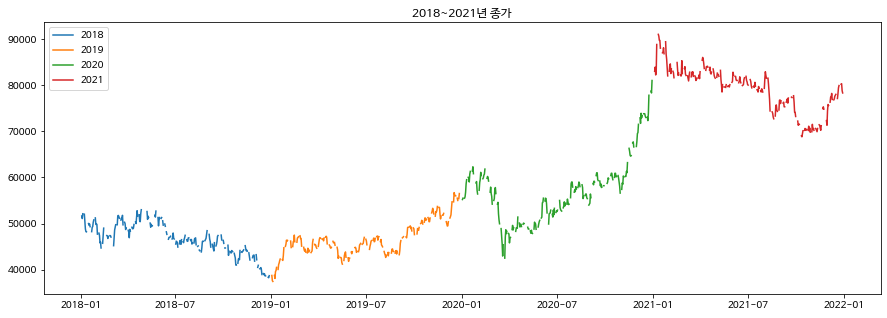

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(samsung_stock_data_adj_2018.Close)
plt.plot(samsung_stock_data_adj_2019.Close)
plt.plot(samsung_stock_data_adj_2020.Close)
plt.plot(samsung_stock_data_adj_2021.Close)
plt.title("2018~2021년 종가")
plt.legend(["2018", "2019", "2020", "2021"])

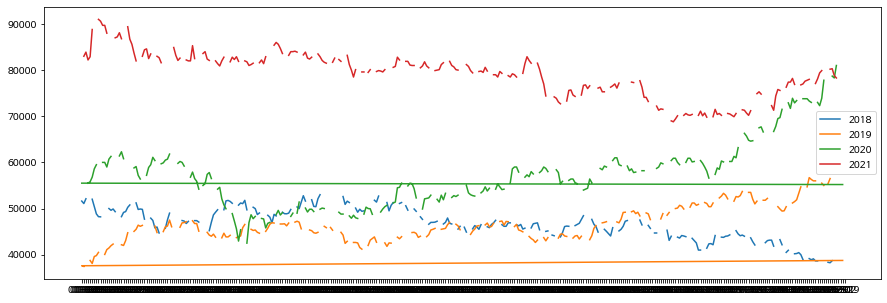

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(samsung_stock_data_adj_2018.set_index("MONTH_DAY").Close)
plt.plot(samsung_stock_data_adj_2019.set_index("MONTH_DAY").Close)
plt.plot(samsung_stock_data_adj_2020.set_index("MONTH_DAY").Close)
plt.plot(samsung_stock_data_adj_2021.set_index("MONTH_DAY").Close)
plt.legend(["2018", "2019", "2020", "2021"])

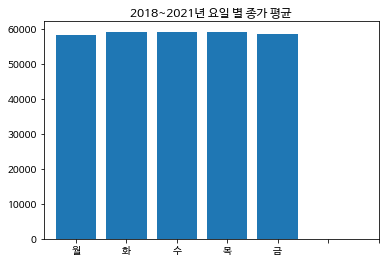

In [ ]:
temp = samsung_stock_data_adj.groupby("DAY_OF_WEEK")["Close"].mean()
plt.bar(temp.index, temp.values)
plt.xticks(temp.index, ["월", "화", "수", "목", "금"])
plt.title("2018~2021년 요일 별 종가 평균")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


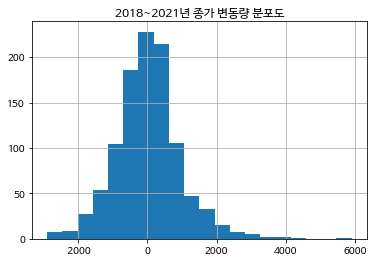

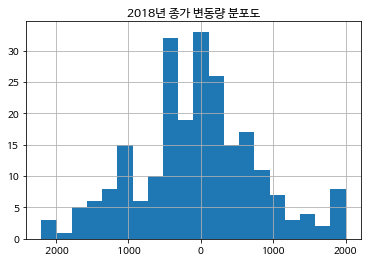

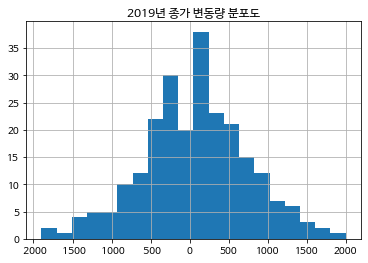

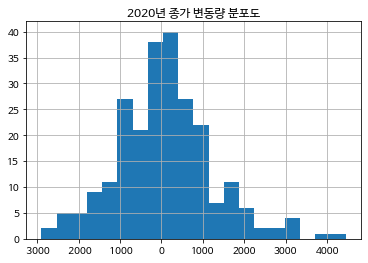

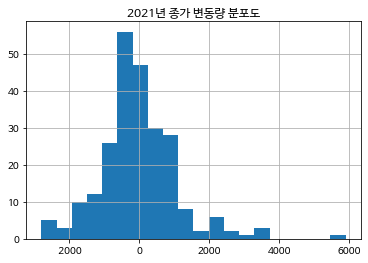

In [ ]:
samsung_stock_data["DIFF_1"].hist(bins=20)
plt.title("2018~2021년 종가 변동량 분포도")
plt.show()
samsung_stock_data_2018["DIFF_1"].hist(bins=20)
plt.title("2018년 종가 변동량 분포도")
plt.show()
samsung_stock_data_2019["DIFF_1"].hist(bins=20)
plt.title("2019년 종가 변동량 분포도")
plt.show()
samsung_stock_data_2020["DIFF_1"].hist(bins=20)
plt.title("2020년 종가 변동량 분포도")
plt.show()
samsung_stock_data_2021["DIFF_1"].hist(bins=20)
plt.title("2021년 종가 변동량 분포도")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


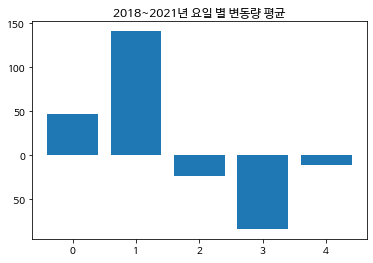

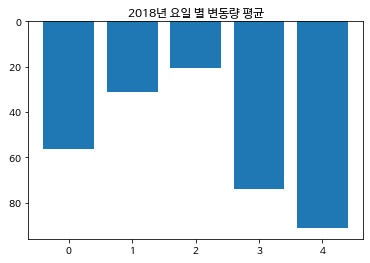

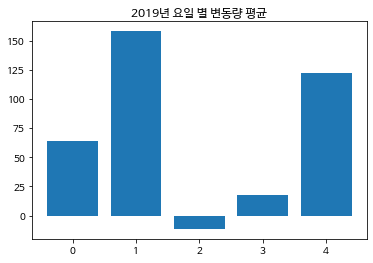

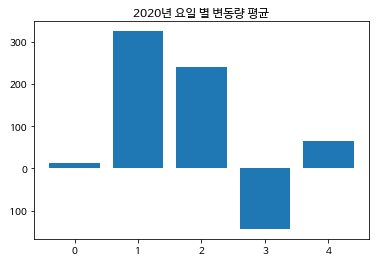

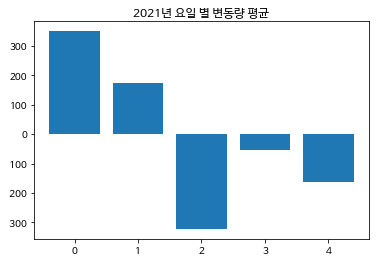

In [ ]:
temp = samsung_stock_data.groupby("DAY_OF_WEEK")["DIFF_1"].mean()
plt.bar(temp.index, temp.values)
plt.title("2018~2021년 요일 별 변동량 평균")
plt.show()
temp = samsung_stock_data_2018.groupby("DAY_OF_WEEK")["DIFF_1"].mean()
plt.bar(temp.index, temp.values)
plt.title("2018년 요일 별 변동량 평균")
plt.show()
temp = samsung_stock_data_2019.groupby("DAY_OF_WEEK")["DIFF_1"].mean()
plt.bar(temp.index, temp.values)
plt.title("2019년 요일 별 변동량 평균")
plt.show()
temp = samsung_stock_data_2020.groupby("DAY_OF_WEEK")["DIFF_1"].mean()
plt.bar(temp.index, temp.values)
plt.title("2020년 요일 별 변동량 평균")
plt.show()
temp = samsung_stock_data_2021.groupby("DAY_OF_WEEK")["DIFF_1"].mean()
plt.bar(temp.index, temp.values)
plt.title("2021년 요일 별 변동량 평균")
plt.show()

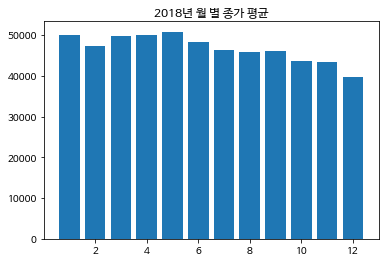

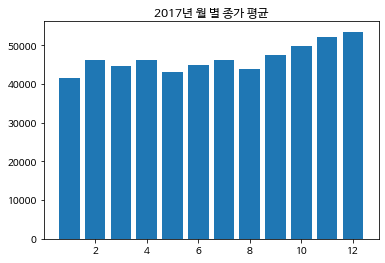

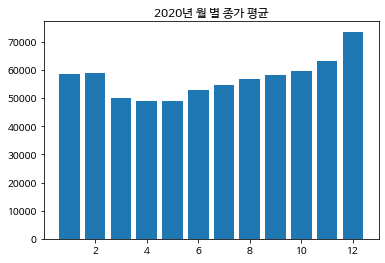

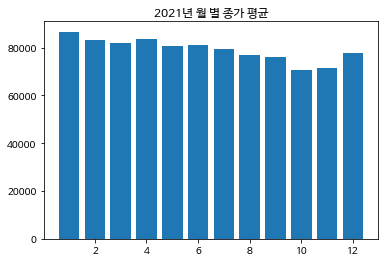

In [ ]:
temp = samsung_stock_data_adj_2018.groupby("MONTH")["Close"].mean()
plt.bar(temp.index, temp.values)
plt.title("2018년 월 별 종가 평균")
plt.show()
temp = samsung_stock_data_adj_2019.groupby("MONTH")["Close"].mean()
plt.bar(temp.index, temp.values)
plt.title("2017년 월 별 종가 평균")
plt.show()
temp = samsung_stock_data_adj_2020.groupby("MONTH")["Close"].mean()
plt.bar(temp.index, temp.values)
plt.title("2020년 월 별 종가 평균")
plt.show()
temp = samsung_stock_data_adj_2021.groupby("MONTH")["Close"].mean()
plt.bar(temp.index, temp.values)
plt.title("2021년 월 별 종가 평균")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


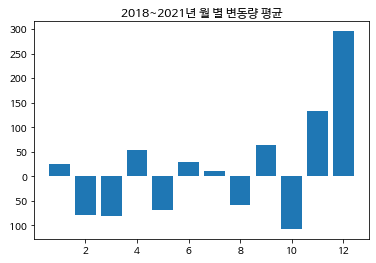

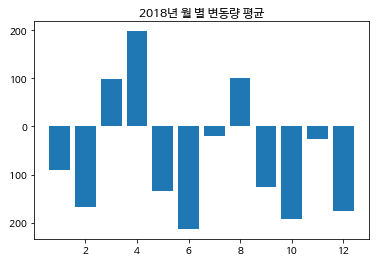

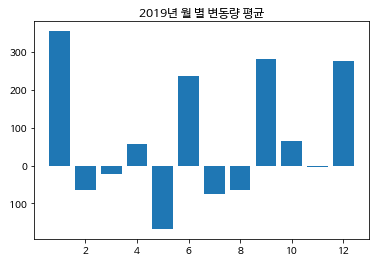

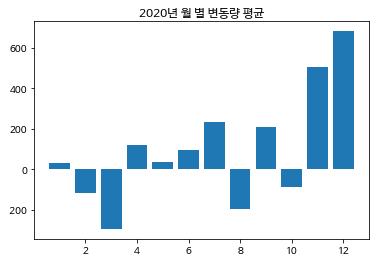

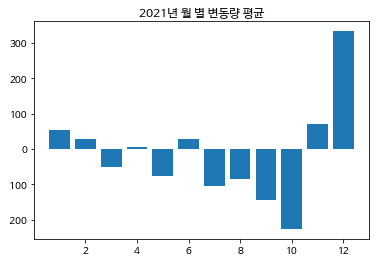

In [ ]:
temp = samsung_stock_data.groupby("MONTH")["DIFF_1"].mean()
plt.bar(temp.index, temp.values)
plt.title("2018~2021년 월 별 변동량 평균")
plt.show()
temp = samsung_stock_data_2018.groupby("MONTH")["DIFF_1"].mean()
plt.bar(temp.index, temp.values)
plt.title("2018년 월 별 변동량 평균")
plt.show()
temp = samsung_stock_data_2019.groupby("MONTH")["DIFF_1"].mean()
plt.bar(temp.index, temp.values)
plt.title("2019년 월 별 변동량 평균")
plt.show()
temp = samsung_stock_data_2020.groupby("MONTH")["DIFF_1"].mean()
plt.bar(temp.index, temp.values)
plt.title("2020년 월 별 변동량 평균")
plt.show()
temp = samsung_stock_data_2021.groupby("MONTH")["DIFF_1"].mean()
plt.bar(temp.index, temp.values)
plt.title("2021년 월 별 변동량 평균")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


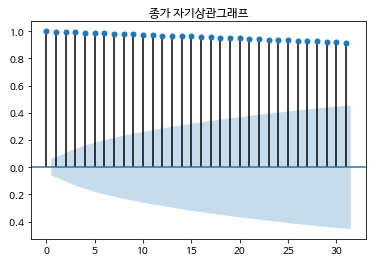

In [ ]:
tsa.plot_acf(samsung_stock_data["Close"])
plt.title("종가 자기상관그래프")
plt.show()

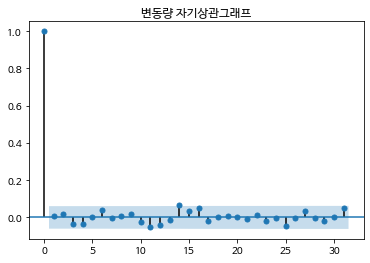

In [ ]:
tsa.plot_acf(samsung_stock_data["Close"].diff()[1:])
plt.title("변동량 자기상관그래프")
# tsa.plot_acf(samsung_stock_data_2018["Close"].diff()[1:])
# tsa.plot_acf(samsung_stock_data_2019["Close"].diff()[1:])
# tsa.plot_acf(samsung_stock_data_2020["Close"].diff()[1:])
# tsa.plot_acf(samsung_stock_data_2021["Close"].diff()[1:])
plt.show()

In [ ]:
samsung_stock_data_cor = samsung_stock_data.corr()
samsung_stock_data_cor["Close_cor_ABS"] = abs(samsung_stock_data_cor["Close"])
samsung_stock_data_cor["DIFF_-1_cor_ABS"] = abs(samsung_stock_data_cor["DIFF_-1"])
samsung_stock_data_cor.sort_values(by=["DIFF_-1_cor_ABS"], ascending=False)[["DIFF_-1", "DIFF_-2", "DIFF_-3"]]

,DIFF_-1,DIFF_-2,DIFF_-3
DIFF_-1,1.000000,0.709845,5.864911e-01
NextDay_Change,-0.959445,-0.678635,-5.635921e-01
NextDay_Class,-0.750511,-0.545127,-4.286884e-01
DIFF_-2,0.709845,1.000000,8.214786e-01
DIFF_-3,0.586491,0.821479,1.000000e+00
IXIC_Change,-0.220741,-0.153148,-1.401663e-01
DJI_Change,-0.178765,-0.121872,-1.296261e-01
IXIC_Class,-0.165698,-0.124115,-8.939701e-02
DJI_Class,-0.163789,-0.116355,-9.533108e-02
USD_KRX_Change,0.127998,0.113312,8.771663e-02


In [ ]:
1

1

In [ ]:
samsung_stock_data_2021_cor = samsung_stock_data_2021.corr()
samsung_stock_data_2021_cor["Close_cor_ABS"] = abs(samsung_stock_data_2021_cor["Close"])
samsung_stock_data_2021_cor.sort_values(by=["Close_cor_ABS"], ascending=False)[:10]

,Close,Change,Class,NextDay_Close,NextDay_Change,NextDay_Class,KOSPI_Close,KOSPI_Change,KOSPI_Class,USD_KRX_Close,USD_KRX_Change,USD_KRX_Class,DGS20,DGS20_Change,DGS20_Class,DGS10,DGS10_Change,DGS10_Class,DGS5,DGS5_Change,DGS5_Class,DGS1,DGS1_Change,DGS1_Class,T10Y2Y,T10Y2Y_Change,T10Y2Y_Class,DJI_Close,DJI_Change,DJI_Class,IXIC_Close,IXIC_Change,IXIC_Class,BPS,PER,PBR,EPS,DIV,DPS,종목거래실적_기관,종목거래실적_기관_Change,종목거래실적_기관_Class,종목거래실적_외국인,종목거래실적_외국인_Change,종목거래실적_외국인_Class,시장거래실적_기관,시장거래실적_기관_Change,시장거래실적_기관_Class,시장거래실적_외국인,시장거래실적_외국인_Change,시장거래실적_외국인_Class,종목_외국인보유수량,종목_외국인보유수량_Change,종목_외국인보유수량_Class,종목_외국인지분율,종목_외국인지분율_Change,종목_외국인지분율_Class,종목공매도_거래량,종목공매도_거래량_Change,종목공매도_거래량_Class,종목공매도_잔고수량,종목공매도_잔고수량_Change,종목공매도_잔고수량_Class,시장_공매도_기관,시장_공매도_기관_Change,시장_공매도_기관_Class,시장_공매도_외국인,시장_공매도_외국인_Change,시장_공매도_외국인_Class,News_label_mean,News_negative_mean,News_neutral_mean,News_positive_mean,News_label_sum,News_negative_sum,...,DIFF_78,MV_78,SHIFT_79,DIFF_79,MV_79,SHIFT_80,DIFF_80,MV_80,SHIFT_81,DIFF_81,MV_81,SHIFT_82,DIFF_82,MV_82,SHIFT_83,DIFF_83,MV_83,SHIFT_84,DIFF_84,MV_84,SHIFT_85,DIFF_85,MV_85,SHIFT_86,DIFF_86,MV_86,SHIFT_87,DIFF_87,MV_87,SHIFT_88,DIFF_88,MV_88,SHIFT_89,DIFF_89,MV_89,SHIFT_90,DIFF_90,MV_90,SHIFT_91,DIFF_91,MV_91,SHIFT_92,DIFF_92,MV_92,SHIFT_93,DIFF_93,MV_93,SHIFT_94,DIFF_94,MV_94,SHIFT_95,DIFF_95,MV_95,SHIFT_96,DIFF_96,MV_96,SHIFT_97,DIFF_97,MV_97,SHIFT_98,DIFF_98,MV_98,SHIFT_99,DIFF_99,MV_99,SHIFT_100,DIFF_100,MV_100,SHIFT_101,DIFF_101,MV_101,DIFF_-1,DIFF_-2,DIFF_-3,Close_cor_ABS
Close,1.000000,0.107862,0.068751,0.974528,-0.142777,-0.118611,0.468125,0.168481,0.134302,-0.854113,0.063771,-0.050381,0.004104,0.076518,0.061783,-0.275122,0.067689,0.079892,-0.702968,0.011422,-0.038714,-0.329323,-0.090745,-0.098519,0.248675,0.121437,0.105672,-0.716097,0.008399,-0.009720,-0.750619,-0.047014,-0.073966,-0.676200,0.866220,0.973848,-0.676200,-0.784581,-0.676200,-0.315790,-0.026755,-0.016125,0.026433,-0.035777,-0.043738,-0.281320,-0.017076,0.017992,0.011646,-0.030631,0.002410,0.905436,0.103800,0.053565,0.905442,0.102639,0.025425,-0.406334,0.009119,0.016340,0.119990,-0.008647,-0.102258,-0.374383,0.008055,0.044437,-0.553819,0.000646,-0.040796,0.262350,-0.333954,0.166932,0.115894,0.269415,-0.159029,...,0.785073,-0.071389,-0.552688,0.787332,-0.084487,-0.560794,0.790028,-0.097489,-0.569110,0.792897,-0.110401,-0.576825,0.795713,-0.123191,-0.585887,0.799322,-0.135892,-0.594611,0.802899,-0.148488,-0.602437,0.806056,-0.160959,-0.609847,0.809022,-0.173299,-0.616118,0.811421,-0.185486,-0.622144,0.813681,-0.197519,-0.626859,0.815488,-0.209359,-0.627863,0.815391,-0.220922,-0.628471,0.815067,-0.232210,-0.630017,0.815321,-0.243245,-0.632428,0.816097,-0.254052,-0.633104,0.815937,-0.264592,-0.635748,0.816859,-0.274912,-0.639601,0.818433,-0.285045,-0.642433,0.819531,-0.294971,-0.645188,0.820558,-0.304691,-0.648811,0.822055,-0.314236,-0.653837,0.824249,-0.323652,-0.659308,0.826762,-0.332953,0.119319,0.173916,0.207474,1.000000
NextDay_Close,0.974528,0.126012,0.078250,1.000000,0.082301,0.047385,0.428790,0.176030,0.152642,-0.853733,0.024047,-0.064545,-0.006835,0.048627,0.040769,-0.282807,0.038930,0.058548,-0.698910,-0.018927,-0.069064,-0.313980,-0.092489,-0.099345,0.233839,0.093681,0.085699,-0.713520,0.039474,0.011451,-0.740669,0.014702,-0.026984,-0.676197,0.855014,0.954246,-0.676197,-0.780465,-0.676197,-0.305695,-0.036326,-0.026261,0.044831,-0.007258,-0.015099,-0.273542,-0.029197,-0.002184,0.035027,-0.000524,0.010667,0.895478,0.091559,0.030026,0.895501,0.092911,-0.004549,-0.421849,-0.014883,-0.006223,0.124300,-0.034690,-0.098902,-0.380818,0.010899,0.035300,-0.549785,-0.002286,-0.048070,0.268724,-0.356485,0.193997,0.106489,0.257244,-0.188700,...,0.778989,-0.086381,-0.558725,0.782158,-0.099386,-0.566939,0.785031,-0.112298,-0.574642,0.787543,-0.125105,-0.583458,0.791257,-0.137821,-0.592517,0.794943,-0.150448,-0.600331,0.797918,-0.162949,-0.607545,0.800690,-0.175311,-0.613413,0.802581,-0.187507,-0.619368,0.804809,-0.199546,-0.623661,0.805848,-0.

In [ ]:
samsung_corr_matrix = samsung_stock_data.drop(columns=["DIFF_-1", "DIFF_-2", "DIFF_-3"]).corr()

In [ ]:
samsung_corr_matrix["NextDay_Change_ABS"] = abs(samsung_corr_matrix["NextDay_Change"])

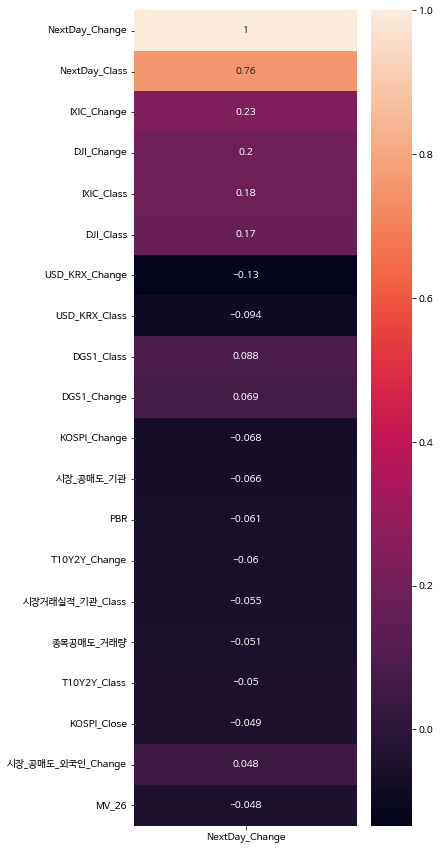

In [ ]:
plt.figure(figsize=(5,15))
sns.heatmap(samsung_corr_matrix.sort_values(by="NextDay_Change_ABS", ascending=False)[["NextDay_Change"]][:20], annot = True)
plt.show()

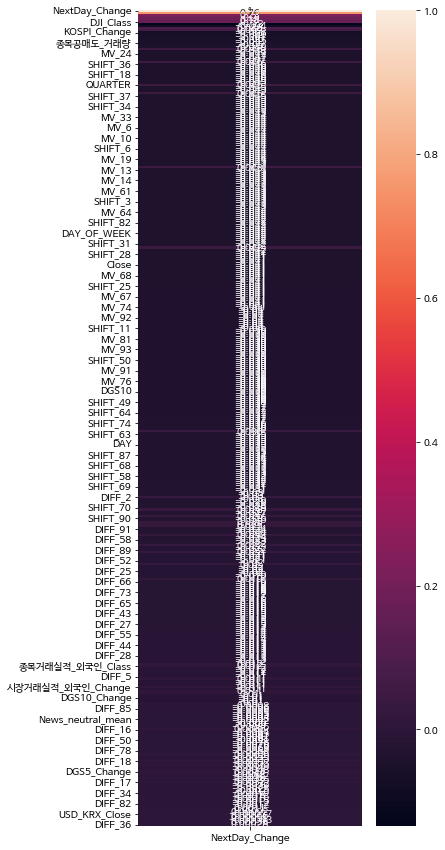

In [ ]:
plt.figure(figsize=(5,15))
sns.heatmap(samsung_corr_matrix.sort_values(by="NextDay_Change_ABS", ascending=False)[["NextDay_Change"]], annot = True)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


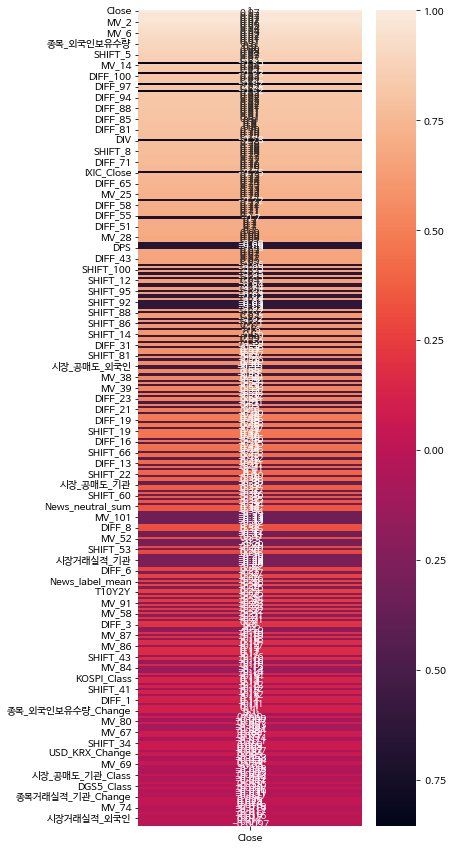

In [ ]:
plt.figure(figsize=(5,15))
sns.heatmap(samsung_stock_data_2021_cor.sort_values(by=["Close_cor_ABS"], ascending=False)[["Close"]][:-10], annot = True)
plt.show()

In [ ]:
samsung_stock_data_2021_cor.sort_values(by=["Close_cor_ABS"], ascending=False)[:10]

,Close,Change,Class,NextDay_Close,NextDay_Change,NextDay_Class,KOSPI_Close,KOSPI_Change,KOSPI_Class,USD_KRX_Close,USD_KRX_Change,USD_KRX_Class,DGS20,DGS20_Change,DGS20_Class,DGS10,DGS10_Change,DGS10_Class,DGS5,DGS5_Change,DGS5_Class,DGS1,DGS1_Change,DGS1_Class,T10Y2Y,T10Y2Y_Change,T10Y2Y_Class,DJI_Close,DJI_Change,DJI_Class,IXIC_Close,IXIC_Change,IXIC_Class,BPS,PER,PBR,EPS,DIV,DPS,종목거래실적_기관,종목거래실적_기관_Change,종목거래실적_기관_Class,종목거래실적_외국인,종목거래실적_외국인_Change,종목거래실적_외국인_Class,시장거래실적_기관,시장거래실적_기관_Change,시장거래실적_기관_Class,시장거래실적_외국인,시장거래실적_외국인_Change,시장거래실적_외국인_Class,종목_외국인보유수량,종목_외국인보유수량_Change,종목_외국인보유수량_Class,종목_외국인지분율,종목_외국인지분율_Change,종목_외국인지분율_Class,종목공매도_거래량,종목공매도_거래량_Change,종목공매도_거래량_Class,종목공매도_잔고수량,종목공매도_잔고수량_Change,종목공매도_잔고수량_Class,시장_공매도_기관,시장_공매도_기관_Change,시장_공매도_기관_Class,시장_공매도_외국인,시장_공매도_외국인_Change,시장_공매도_외국인_Class,News_label_mean,News_negative_mean,News_neutral_mean,News_positive_mean,News_label_sum,News_negative_sum,...,DIFF_78,MV_78,SHIFT_79,DIFF_79,MV_79,SHIFT_80,DIFF_80,MV_80,SHIFT_81,DIFF_81,MV_81,SHIFT_82,DIFF_82,MV_82,SHIFT_83,DIFF_83,MV_83,SHIFT_84,DIFF_84,MV_84,SHIFT_85,DIFF_85,MV_85,SHIFT_86,DIFF_86,MV_86,SHIFT_87,DIFF_87,MV_87,SHIFT_88,DIFF_88,MV_88,SHIFT_89,DIFF_89,MV_89,SHIFT_90,DIFF_90,MV_90,SHIFT_91,DIFF_91,MV_91,SHIFT_92,DIFF_92,MV_92,SHIFT_93,DIFF_93,MV_93,SHIFT_94,DIFF_94,MV_94,SHIFT_95,DIFF_95,MV_95,SHIFT_96,DIFF_96,MV_96,SHIFT_97,DIFF_97,MV_97,SHIFT_98,DIFF_98,MV_98,SHIFT_99,DIFF_99,MV_99,SHIFT_100,DIFF_100,MV_100,SHIFT_101,DIFF_101,MV_101,DIFF_-1,DIFF_-2,DIFF_-3,Close_cor_ABS
Close,1.000000,0.107862,0.068751,0.974528,-0.142777,-0.118611,0.468125,0.168481,0.134302,-0.854113,0.063771,-0.050381,0.004104,0.076518,0.061783,-0.275122,0.067689,0.079892,-0.702968,0.011422,-0.038714,-0.329323,-0.090745,-0.098519,0.248675,0.121437,0.105672,-0.716097,0.008399,-0.009720,-0.750619,-0.047014,-0.073966,-0.676200,0.866220,0.973848,-0.676200,-0.784581,-0.676200,-0.315790,-0.026755,-0.016125,0.026433,-0.035777,-0.043738,-0.281320,-0.017076,0.017992,0.011646,-0.030631,0.002410,0.905436,0.103800,0.053565,0.905442,0.102639,0.025425,-0.406334,0.009119,0.016340,0.119990,-0.008647,-0.102258,-0.374383,0.008055,0.044437,-0.553819,0.000646,-0.040796,0.262350,-0.333954,0.166932,0.115894,0.269415,-0.159029,...,0.785073,-0.071389,-0.552688,0.787332,-0.084487,-0.560794,0.790028,-0.097489,-0.569110,0.792897,-0.110401,-0.576825,0.795713,-0.123191,-0.585887,0.799322,-0.135892,-0.594611,0.802899,-0.148488,-0.602437,0.806056,-0.160959,-0.609847,0.809022,-0.173299,-0.616118,0.811421,-0.185486,-0.622144,0.813681,-0.197519,-0.626859,0.815488,-0.209359,-0.627863,0.815391,-0.220922,-0.628471,0.815067,-0.232210,-0.630017,0.815321,-0.243245,-0.632428,0.816097,-0.254052,-0.633104,0.815937,-0.264592,-0.635748,0.816859,-0.274912,-0.639601,0.818433,-0.285045,-0.642433,0.819531,-0.294971,-0.645188,0.820558,-0.304691,-0.648811,0.822055,-0.314236,-0.653837,0.824249,-0.323652,-0.659308,0.826762,-0.332953,0.119319,0.173916,0.207474,1.000000
NextDay_Close,0.974528,0.126012,0.078250,1.000000,0.082301,0.047385,0.428790,0.176030,0.152642,-0.853733,0.024047,-0.064545,-0.006835,0.048627,0.040769,-0.282807,0.038930,0.058548,-0.698910,-0.018927,-0.069064,-0.313980,-0.092489,-0.099345,0.233839,0.093681,0.085699,-0.713520,0.039474,0.011451,-0.740669,0.014702,-0.026984,-0.676197,0.855014,0.954246,-0.676197,-0.780465,-0.676197,-0.305695,-0.036326,-0.026261,0.044831,-0.007258,-0.015099,-0.273542,-0.029197,-0.002184,0.035027,-0.000524,0.010667,0.895478,0.091559,0.030026,0.895501,0.092911,-0.004549,-0.421849,-0.014883,-0.006223,0.124300,-0.034690,-0.098902,-0.380818,0.010899,0.035300,-0.549785,-0.002286,-0.048070,0.268724,-0.356485,0.193997,0.106489,0.257244,-0.188700,...,0.778989,-0.086381,-0.558725,0.782158,-0.099386,-0.566939,0.785031,-0.112298,-0.574642,0.787543,-0.125105,-0.583458,0.791257,-0.137821,-0.592517,0.794943,-0.150448,-0.600331,0.797918,-0.162949,-0.607545,0.800690,-0.175311,-0.613413,0.802581,-0.187507,-0.619368,0.804809,-0.199546,-0.623661,0.805848,-0.